# matplotlib 

In [4]:
#conda install -c conda-forge matplotlib

In [5]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

`-`[그래프 옵션](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

## line plot

In [10]:
x = [1,2,3,4]
y = [1,2,4,3]

### line style

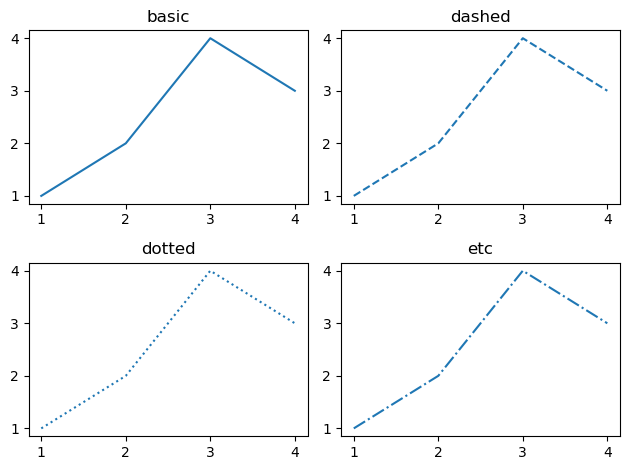

In [17]:
fig,axes = plt.subplots(2,2)

(ax1,ax2),(ax3,ax4) = axes

ax1.plot(x,y)
ax1.set_title("basic")

ax2.plot(x,y,"--")
ax2.set_title("dashed")

ax3.plot(x,y,":")
ax3.set_title("dotted")

ax4.plot(x,y,'-.')
ax4.set_title("etc")
fig.tight_layout()

### color + line

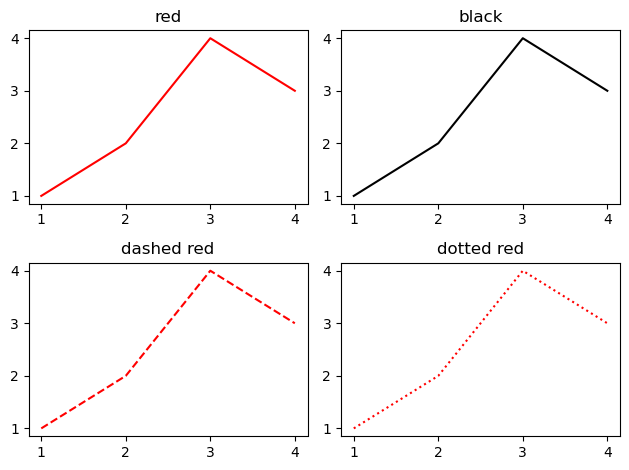

In [23]:
fig,axes = plt.subplots(2,2)

(ax1,ax2),(ax3,ax4) = axes

ax1.plot(x,y,"r")
ax1.set_title("red")

ax2.plot(x,y,"k")
ax2.set_title("black")

ax3.plot(x,y,"--r")
ax3.set_title("dashed red")

ax4.plot(x,y,':r')
ax4.set_title("dotted red")
fig.tight_layout()

## scatter plot

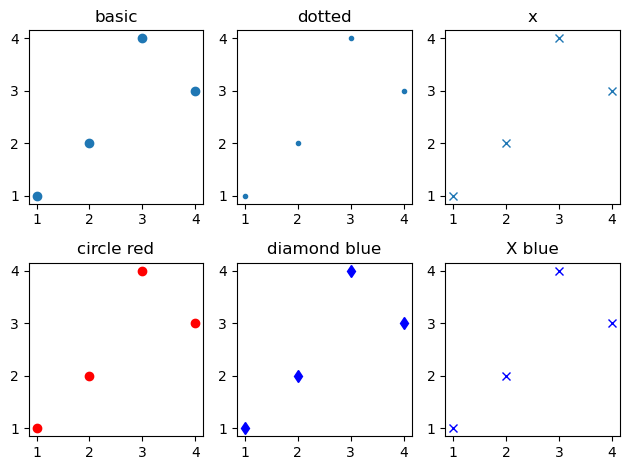

In [28]:
fig,axes = plt.subplots(2,3)

(ax1,ax2,ax3),(ax4,ax5,ax6) = axes

ax1.plot(x,y,"o")
ax1.set_title("basic")

ax2.plot(x,y,".")
ax2.set_title("dotted")

ax3.plot(x,y,"x")
ax3.set_title("x")

ax4.plot(x,y,'or')
ax4.set_title("circle red")

ax5.plot(x,y,'db')
ax5.set_title("diamond blue")

ax6.plot(x,y,'bx')
ax6.set_title("X blue")

fig.tight_layout()

## dot-connected plot

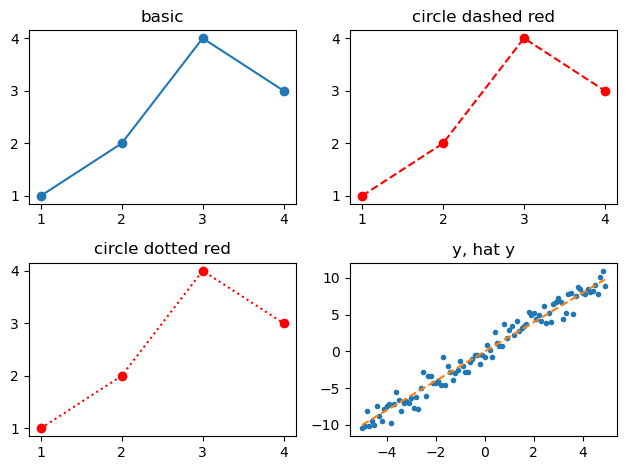

In [35]:
fig,axes = plt.subplots(2,2)

(ax1,ax2),(ax3,ax4) = axes

ax1.plot(x,y,"o-")
ax1.set_title("basic")

ax2.plot(x,y,"o--r")
ax2.set_title("circle dashed red")

ax3.plot(x,y,"o:r")
ax3.set_title("circle dotted red")

x1 = np.arange(-5,5,0.1)
e = np.random.randn(100)
y1 = 2*x1 + e

ax4.plot(x1,y1,'.')
ax4.plot(x1,2*x1,"--")
ax4.set_title("y, hat y")
fig.tight_layout()

## 이미지자료의 이해 및 시각화

`-` 이미지 자료는 rgb값이 저장된 3개의 매트릭스를 쌓은것

* shape : (가로픽셀, 세로픽셀, 3)

* 3은 RGB의 빛의 밝기를 정의

* 밝기는 0-255사이의 int, 0-1사이의 float으로 정함.

* int 255 혹은 float 1은 해당색이 매우 밝다는 것을 의미

`-` 예시 1

In [36]:
r = np.array([0]*25*3).reshape(5,5,3) 
g = np.array([0]*25*3).reshape(5,5,3) 
b = np.array([0]*25*3).reshape(5,5,3) 

In [43]:
r[:3,:3,0] = 255   
g[:3,2:,1] = 255
b[2:,:,2] = 255 

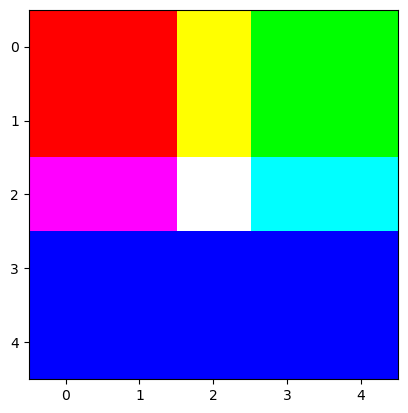

In [44]:
plt.imshow(r+g+b)

`-` RGB에 작은 숫자를 주면 점점 어두워진다.

In [46]:
r[:3,:3,0] = 80
g[:3,2:,1] = 80
b[2:,:,2] = 80

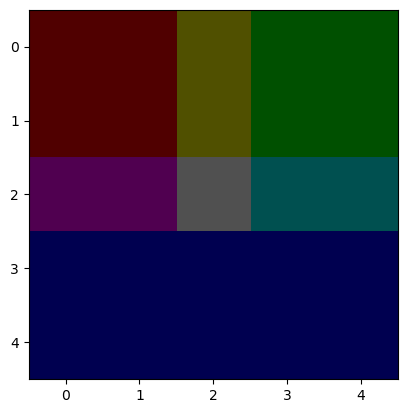

In [47]:
plt.imshow((r+g+b))

`-` 예시 3. r,b,g 값이 float으로 저장되었다면 표준화가 진행된 것으로 컴퓨터가 이해한다.

In [48]:
r[:3,:3,0] = 1
g[:3,2:,1] = 1
b[2:,:,2] = 1

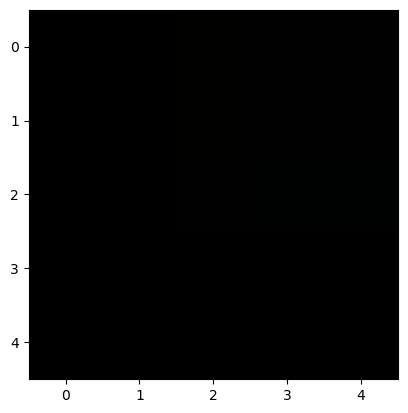

In [49]:
plt.imshow(r+g+b)

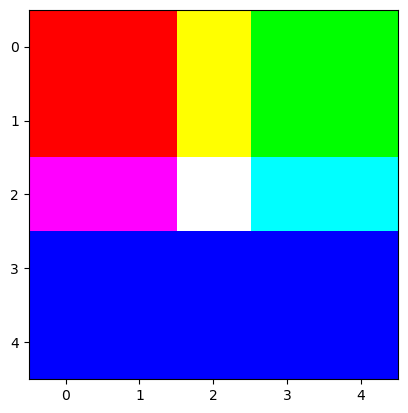

In [50]:
plt.imshow((r+g+b)*1.0)

## 넘파이 활용 (1)

### ex1

$y(t)=cos(2t)$ 와 $x(t)=sin(t)$를 고려할 때,$-3.14 \leq t \leq 3.14$에서 몇 개의 해를 가지는가?

In [56]:
t = np.linspace(-3.14,3.14,1000)
y = np.cos(2*t)
x = np.sin(t)

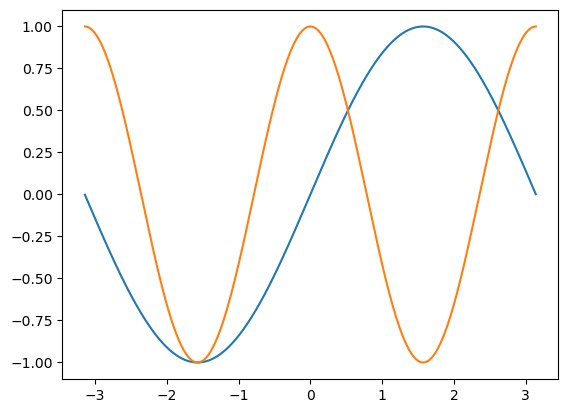

In [57]:
plt.plot(t,x)
plt.plot(t,y)

### ex2

아래와 같은 합성함수가 있다.

$$l(x) = w_0 + w_{1}x, \quad a(x) = \frac {1}{1+e^{-x}}$$

$x  \in [-5,5]$의 범위에서 $a(l(x))$의 그래프를 그려라. (단 이때 $w_0=1, w_1=1$)로 설정한다.

In [60]:
def l(x) :
    return w0+w1*x
def a(x) :
    return 1/(1+np.exp(-x))

In [61]:
x = np.linspace(-5,5,1000)
w0=1
w1=1

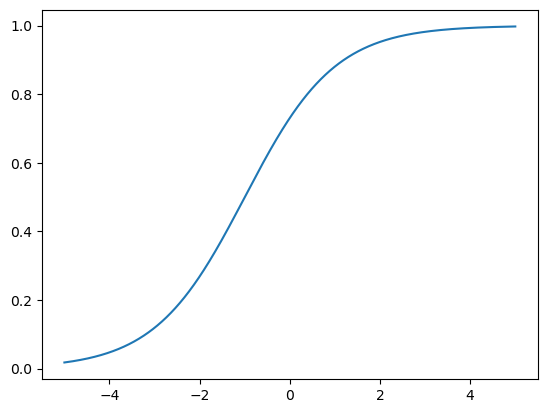

In [62]:
plt.plot(x,a(l(x)))

### ex3

`-` $X$의 각 열의 평균과 표준편차를 구하여라

In [63]:
X = np.array([[11.75 ,  5.72 ],
              [12.39 ,  7.695],
              [11.75 ,  6.93 ],
              [11.625,  4.195],
              [12.6  ,  6.734],
              [11.13 ,  6.688],
              [12.24 ,  7.33 ],
              [13.586,  1.072],
              [10.9  ,  4.125],
              [10.68 ,  3.691]])

`-` 풀이

In [65]:
X.mean(axis=0),X.std(ddof=1,axis=0)

(array([11.8651,  5.418 ]), array([0.87420064, 2.09762829]))

`-` 풀이 2 : np.apply_along_axis

### ex4

X를 columnwise 하게 표준화하라.

In [80]:
def sc(x) :
    return (x-np.mean(x))/x.std(ddof=1) 

* 예비학습 : 1차원 배열에서 첫 번째 인자와 마지막 인자의 평균을 구하는 함수 작성

In [81]:
def my_func(a):
    return (a[0] + a[-1]) * 0.5
b = np.array([[1,2,3], [4,5,6], [7,8,9]])
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [82]:
np.apply_along_axis(my_func, 0, b)

array([4., 5., 6.])

In [83]:
np.apply_along_axis(my_func, 1, b)

array([2., 5., 8.])

* 다시 돌아와서

In [85]:
np.apply_along_axis(sc,0,X)

array([[-0.13166314,  0.14397212],
       [ 0.60043424,  1.08551168],
       [-0.13166314,  0.72081408],
       [-0.27465091, -0.58303943],
       [ 0.84065369,  0.62737522],
       [-0.84088247,  0.60544569],
       [ 0.42884892,  0.91150563],
       [ 1.96854122, -2.07186374],
       [-1.10397997, -0.61641045],
       [-1.35563844, -0.82331079]])

### ex5

`-` 아래는 이미지파일을 불러오는 코드이다.

In [89]:
hani = np.einsum('ijk->jik',np.array(PIL.Image.open('hani.jpeg'),dtype=np.int64)/255)

In [92]:
hani.shape

(4032, 3024, 3)

* 이미지는 가로,세로 `4032 x 3024`개의 격자로 이루어져 있다.

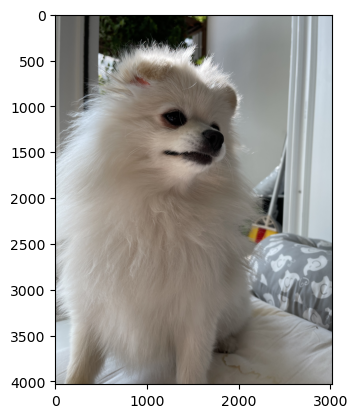

In [93]:
plt.imshow(hani)

`-` 얼굴 영역만 확대

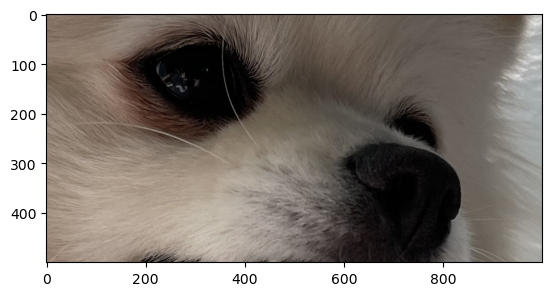

In [94]:
plt.imshow(hani[1000:1500,1000:2000,:])

`-` 하니이미지를 나타내는 어레이를 변형하여 빨간색을 의미하는 칼라만 남기자

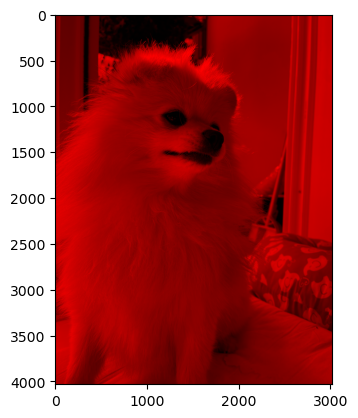

In [97]:
red_hani = hani*0
red_hani[:,:,0] = hani[:,:,0]
plt.imshow(red_hani)

`-` 하니의 모든값에 루트를 취하여 "루트하니"를 만들고 "원본하니"와 "루트하니"를 조우로 나란히 배치 후 출력하라.

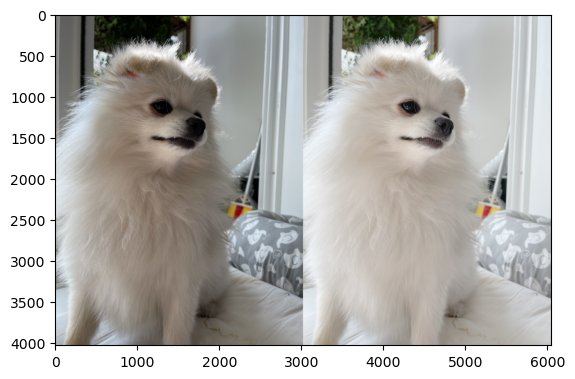

In [99]:
root_hani = np.sqrt(hani)
plt.imshow(np.concatenate([hani,root_hani],axis=1))

`-` 하니의 모든값에 다음 함수를 적용

$$f(x) =\begin{cases} \sqrt{x} & \mbox{x>0.7} \\ x & \mbox{else} \end{cases}$$

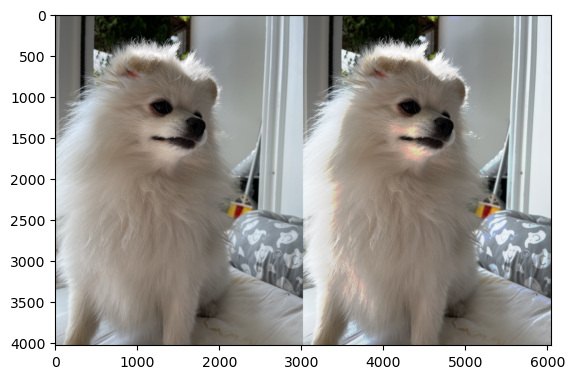

In [101]:
s_hani = np.sqrt(hani)*(hani>0.7) + hani*(hani<=0.7)

plt.imshow(np.concatenate([hani,s_hani],axis=1))

***

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 넘파이 활용 (2)

`-` 아래는 우산모양의 scatter plot을 그리는 좌표값이다.

In [115]:
# 자료저장 
data_raw = np.array(pd.read_csv('https://raw.githubusercontent.com/guebin/2021IR/master/_notebooks/round2.csv')).T
data_raw

array([[ 12,  12,  13, ..., 636, 636, 637],
       [313, 314, 279, ..., 416, 417, 409]], dtype=int64)

In [116]:
data_raw.shape

(2, 5513)

`-` 저장된 자료를 x,y로 분해

In [117]:
x,y = data_raw

`-` 시각화

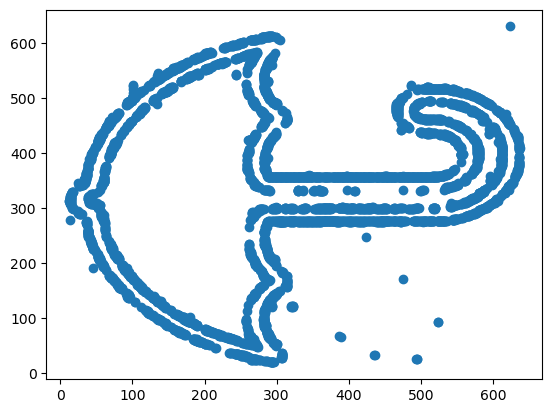

In [119]:
plt.plot(x,y,"o")

## ex1

`-` 각 좌표를 표준화 하고 시각화 해라

In [120]:
x2 = (x-np.mean(x))/np.std(x,ddof=1)
y2 = (y-np.mean(y))/np.std(y,ddof=1)

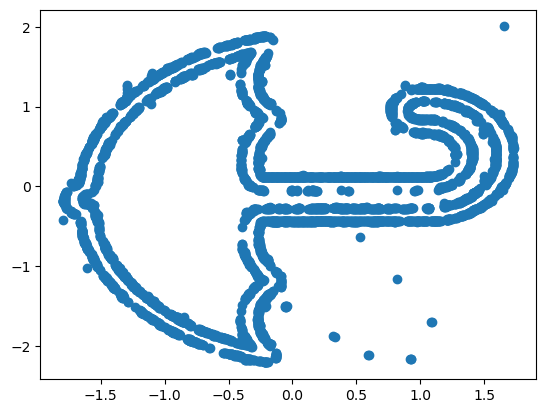

In [121]:
plt.plot(x2,y2,"o")

## ex2

아래와 같은 규칙으로 x,y를 변형해라

$$\bf{xx}_{i}= (cos \,\theta)x_i - (sin \,\theta)y_i$$

$$\bf{yy}_{i}= (sin \,\theta)x_i + (cos \,\theta)y_i$$

$$\theta = \pi/4$$

`-` 풀이 1

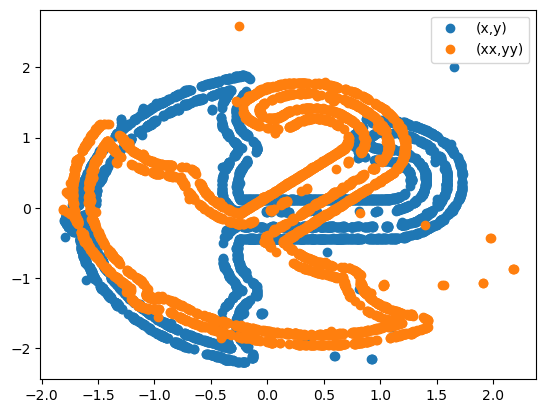

In [132]:
t = np.pi/4

xx = np.cos(t)*x2 - np.sin(t)*y2
yy = np.sin(t)*x2 + np.cos(t)*y2

plt.plot(x2,y2,"o",label=r"(x,y)")
plt.plot(xx,yy,"o",label=r"(xx,yy)")
plt.legend()
fig.tight_layout()


`-` 풀이 2

$$\begin{bmatrix} \bf {xx} \\ \bf{yy} \end{bmatrix}=
   \begin{bmatrix} cos\,\theta & -sin\,\theta  \\ 
                   sin \theta & cos \theta \end{bmatrix}
   \begin{bmatrix} x_1 \\ y_1 \end{bmatrix}$$

In [138]:
R = np.array([[np.cos(t), -np.sin(t)],[np.sin(t),np.cos(t)]])

xy = np.stack([x2,y2])

xx, yy = R@xy

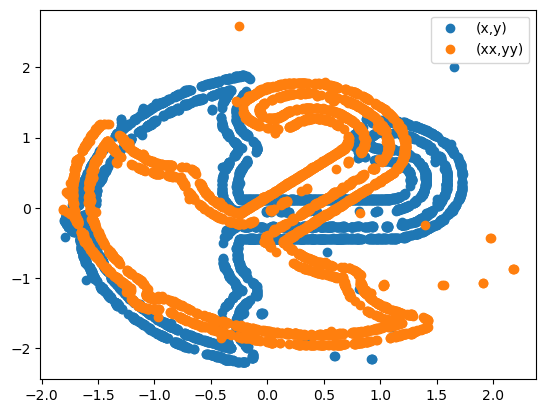

In [141]:
plt.plot(x2,y2,"o",label=r"(x,y)")
plt.plot(xx,yy,"o",label = r"(xx,yy)")
plt.legend()

## ex3

위 과정을 8번 연속진행한 결과를 시각화

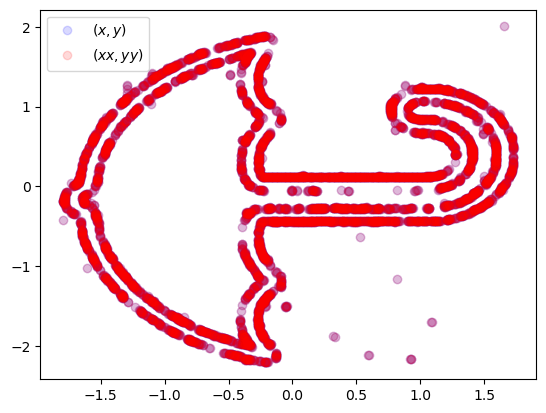

In [172]:
xx,yy = np.linalg.matrix_power(R,8) @ xy
plt.plot(x2,y2,"ob",label =r"$(x,y)$",alpha=0.15)
plt.plot(xx,yy,"or",label =r"$(xx,yy)$",alpha=0.15)
plt.legend()

## ex4

예제 2번을 역변환하는 코드 작성

In [173]:
_x,_y = np.linalg.inv(R)@ xy

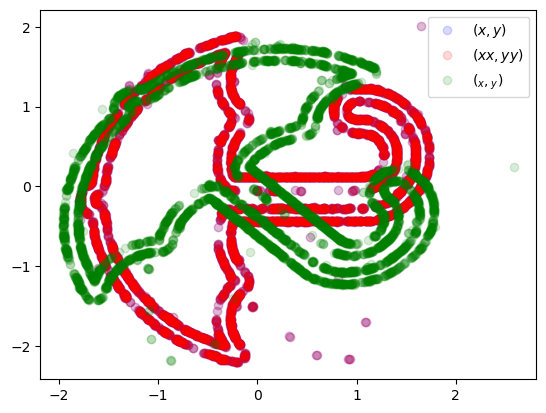

In [175]:
xx,yy = np.linalg.matrix_power(R,8) @ xy
plt.plot(x2,y2,"ob",label =r"$(x,y)$",alpha=0.15)
plt.plot(xx,yy,"or",label =r"$(xx,yy)$",alpha=0.15)
plt.plot(_x,_y,"og",label =r"$(_x,_y)$",alpha=0.15)

plt.legend()

## ex5

아래의 수시에 따르는 수열을 생성

$$x_T = \sum_{t=1}^{T} \varepsilon_t$$

`-` 예비학습

In [178]:
e = np.random.randn(1000)

In [180]:
x = np.cumsum(e)

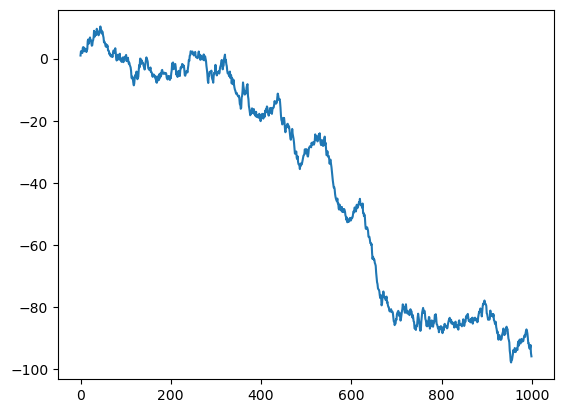

In [181]:
plt.plot(x)

## ex6

아래와 같은 변환을 수행하고 결과를 시각화해라.

$$\bf{xx}_T = \frac 13 (x_{T-1}+ x_{T})$$